In [1]:
import pandas
import pingouin as pin
import numpy as np
from scipy.stats import (
    iqr, uniform, binom, norm, poisson, expon,
    t,
    chisquare,  # for goodness of fit
    rankdata
)
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

data_folder = '../../data'

df_discount_motors = pandas.read_csv(f'{data_folder}/used_cars_sales.csv')
df_discount_motors.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


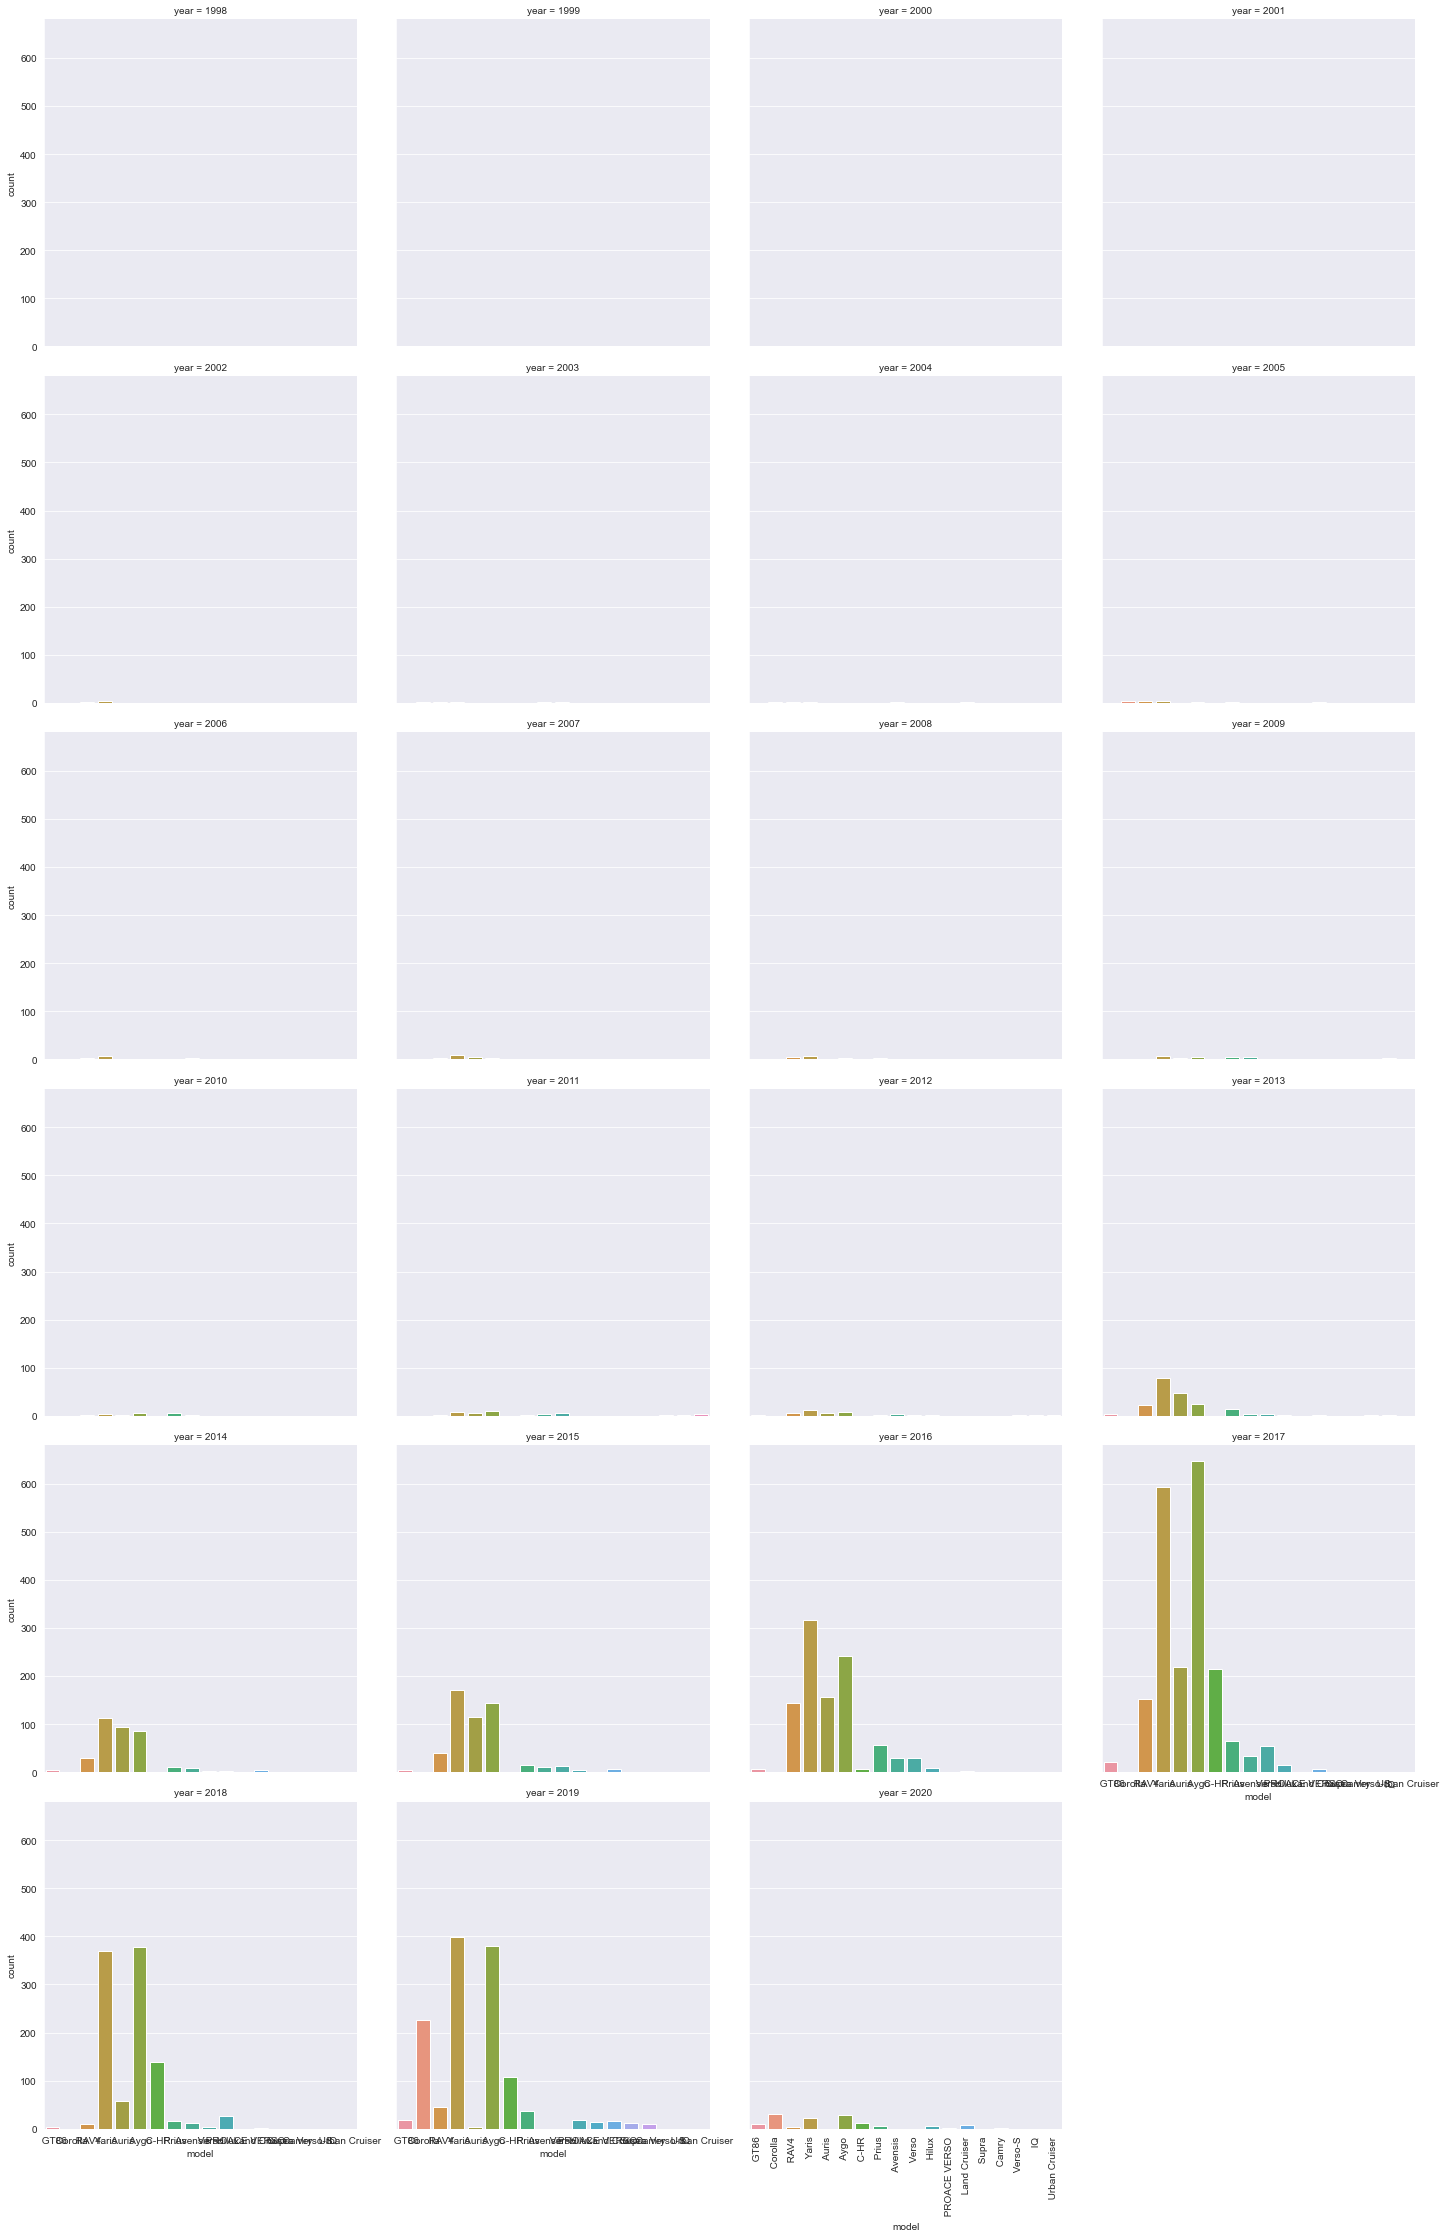

In [16]:
g = sns.catplot(kind='count', data=df_discount_motors, x='model', col='year',
                col_wrap=4, sharex=True, sharey=True)
# plt.xticks(rotation=90)
plt.show()

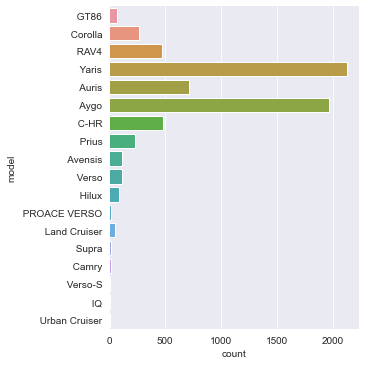

In [7]:
sns.catplot(kind='count', data=df_discount_motors, y='model')
plt.show()

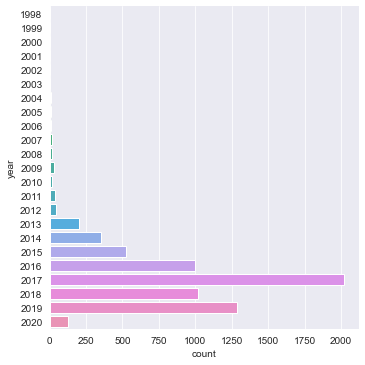

In [8]:
sns.catplot(kind='count', data=df_discount_motors, y='year')
plt.show()

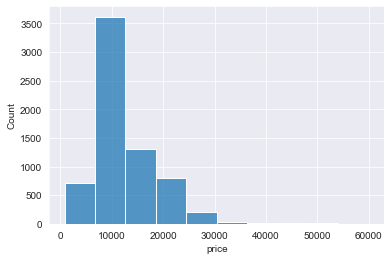

In [11]:
sns.histplot(data=df_discount_motors, x='price', bins=10)
plt.show()

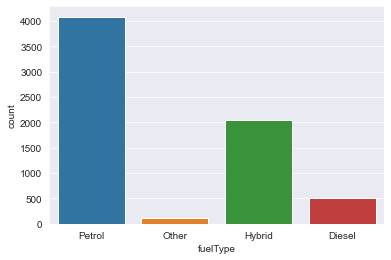

In [17]:
sns.countplot(data=df_discount_motors, x='fuelType')
plt.show()

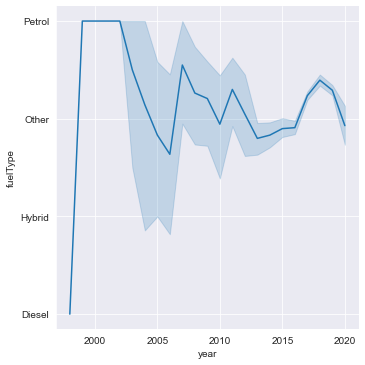

In [19]:
sns.relplot(kind='line', data=df_discount_motors, x='year', y='fuelType')
plt.show()

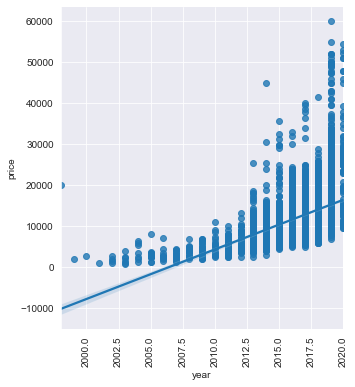

In [24]:
sns.lmplot(data=df_discount_motors, x='year', y='price')
plt.xticks(rotation=90)
plt.show()

In [25]:
pandas.crosstab(df_discount_motors['fuelType'], df_discount_motors['transmission'])

transmission,Automatic,Manual,Other,Semi-Auto
fuelType,,,,
Diesel,97,378,0,28
Hybrid,2038,4,1,0
Other,100,5,0,0
Petrol,422,3439,0,226


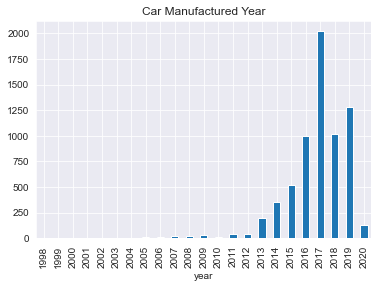

In [43]:
sales_by_year = df_discount_motors['year'].value_counts().rename_axis('year').rename('count').sort_index()
sales_by_year.plot(kind='bar', title='Car Manufactured Year')
plt.show()

# 96% of the sales were from 2013 to 2020

In [41]:
year_pct = df_discount_motors['year'].value_counts(normalize=True).rename_axis('year').rename('count').sort_index()
display(year_pct)
year_pct.loc[2013:2020].sum()

year
1998    0.000148
1999    0.000148
2000    0.000148
2001    0.000148
2002    0.000594
2003    0.000890
2004    0.001039
2005    0.001781
2006    0.001633
2007    0.002968
2008    0.002820
2009    0.004304
2010    0.002671
2011    0.005936
2012    0.006233
2013    0.030276
2014    0.052241
2015    0.077916
2016    0.147967
2017    0.299644
2018    0.150638
2019    0.190858
2020    0.018997
Name: count, dtype: float64

0.9685366577619472

In [46]:
df_13_20_sales = df_discount_motors.query('year >= 2013')
df_13_20_sales.head(20)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0
5,GT86,2017,15998,Manual,26919,Petrol,260,36.2,2.0
6,GT86,2017,18522,Manual,10456,Petrol,145,36.2,2.0
7,GT86,2017,18995,Manual,12340,Petrol,145,36.2,2.0
8,GT86,2020,27998,Manual,516,Petrol,150,33.2,2.0
9,GT86,2016,13990,Manual,37999,Petrol,265,36.2,2.0


In [44]:
df_13_20_sales.groupby(['model', 'year']).count()

price  transmission  mileage  fuelType  tax  mpg  engineSize
model  year                                                              
 Auris 2007      4             4        4         4    4    4           4
       2008      1             1        1         1    1    1           1
       2009      3             3        3         3    3    3           3
       2010      1             1        1         1    1    1           1
       2011      6             6        6         6    6    6           6
...            ...           ...      ...       ...  ...  ...         ...
 Yaris 2016    317           317      317       317  317  317         317
       2017    593           593      593       593  593  593         593
       2018    369           369      369       369  369  369         369
       2019    398           398      398       398  398  398         398
       2020     23            23       23        23   23   23          23

[165 rows x 7 columns]

In [52]:
df_model_year_counts = df_13_20_sales.groupby(['model', 'year'])['model'].count().rename(
    'model_year_count').reset_index()
display(len(model_year_counts))
type(model_year_counts)
df_model_year_counts.head(20)

89

,model,year,model_year_count
0,Auris,2013,48
1,Auris,2014,94
2,Auris,2015,115
3,Auris,2016,156
4,Auris,2017,218
5,Auris,2018,57
6,Auris,2019,3
7,Avensis,2013,4
8,Avensis,2014,8
9,Avensis,2015,11


17

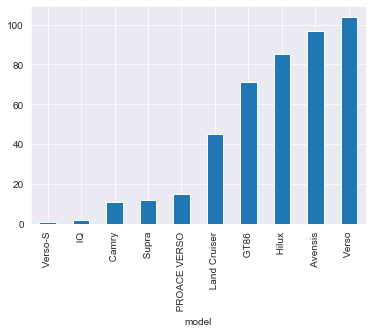

In [60]:
# total model_year sales from 2013-2020
df_least = df_model_year_counts.groupby('model')['model_year_count'].sum().sort_values()
display(len(df_least))
df_least.head(10).plot(kind='bar')
plt.show()

In [64]:
display(df_least.rename('count').head(10).index)
s_least_10 = df_least.rename('count').head(10)
s_least_10

Index([' Verso-S', ' IQ', ' Camry', ' Supra', ' PROACE VERSO', ' Land Cruiser',
       ' GT86', ' Hilux', ' Avensis', ' Verso'],
      dtype='object', name='model')

model
 Verso-S           1
 IQ                2
 Camry            11
 Supra            12
 PROACE VERSO     15
 Land Cruiser     45
 GT86             71
 Hilux            85
 Avensis          97
 Verso           104
Name: count, dtype: int64

In [66]:
df_least_13_20_sales = df_13_20_sales[df_13_20_sales['model'].isin(s_least_10.index)]
df_least_13_20_sales.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [83]:
s_least_list = df_least_13_20_sales['model'].value_counts()
s_least_list

 Verso           104
 Avensis          97
 Hilux            85
 GT86             71
 Land Cruiser     45
 PROACE VERSO     15
 Supra            12
 Camry            11
 IQ                2
 Verso-S           1
Name: model, dtype: int64

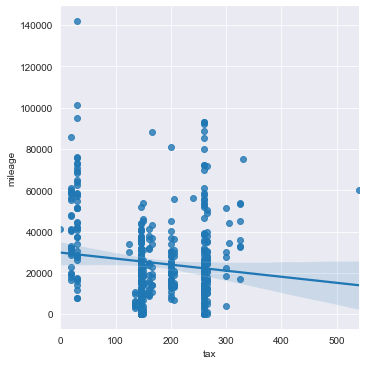

In [74]:
sns.lmplot(data=df_least_13_20_sales, x='tax', y='mileage')
plt.show()

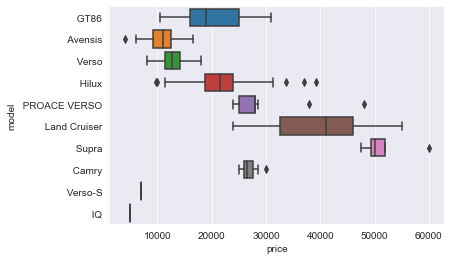

In [73]:
sns.boxplot(data=df_least_13_20_sales, y='model', x='price')
plt.show()

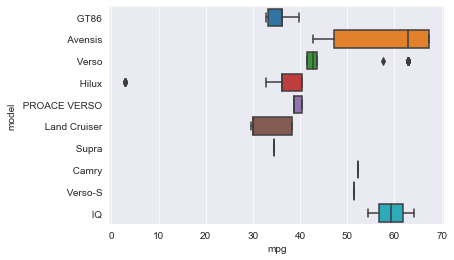

In [75]:
sns.boxplot(data=df_least_13_20_sales, y='model', x='mpg')
plt.show()

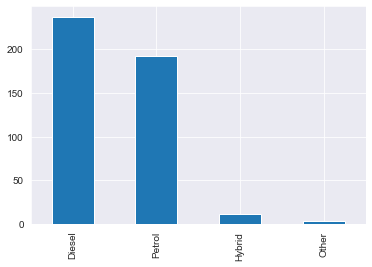

In [80]:
df_least_13_20_sales['fuelType'].value_counts().rename('fuel_type_count').plot(
    kind='bar')  #,title='Least Sales Fuel Type'
plt.show()

In [92]:
least_list = list(s_least_10.reset_index()['model'].str.strip())
sale_category = []
temp_models = list(df_discount_motors['model'].str.strip())
for m in temp_models:
    if m in least_list:
        sale_category.append('low')
    else:
        sale_category.append('high')
df_discount_motors['sale_category'] = sale_category
df_discount_motors.query("sale_category == 'low'")

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,sale_category
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0,low
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0,low
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0,low
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0,low
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0,low
...,...,...,...,...,...,...,...,...,...,...
6729,IQ,2013,4950,Manual,72913,Petrol,30,54.3,1.3,low
6730,IQ,2013,4849,Manual,41142,Petrol,0,64.2,1.0,low
6731,IQ,2011,5995,Automatic,29000,Petrol,20,58.9,1.0,low
6732,IQ,2012,2495,Manual,72498,Petrol,0,64.2,1.0,low


1-sample hypothesis test z-score formula


![one_sample](one.png)

In [99]:
# _The 1-sample proportion hypothesis test for low selling cars
p_0 = 0.06
p_hat = (df_discount_motors['sale_category'] == 'low').mean()
n = len(df_discount_motors)
numerator = p_hat - p_0
denominator = np.sqrt(p_0 * (1 - p_0) / n)
z_score = numerator/denominator
p_val = 1 - norm.cdf(z_score,loc=0,scale=1)
p_val

8.74986585386317e-06

In [101]:
best = df_discount_motors.query("sale_category == 'high'")
best.describe()

,year,price,mileage,tax,mpg,engineSize
count,6250.000000,6250.000000,6250.000000,6250.000000,6250.000000,6250.000000
mean,2016.783680,12048.316160,22280.400320,88.710400,64.558800,1.423808
std,2.124224,5482.809418,18013.883063,69.407346,15.035873,0.395408
min,1999.000000,899.000000,2.000000,0.000000,6.000000,0.000000
25%,2016.000000,8076.250000,9351.000000,0.000000,56.500000,1.000000
50%,2017.000000,10496.500000,18140.000000,135.000000,66.000000,1.500000
75%,2018.000000,14495.000000,30563.750000,145.000000,72.400000,1.800000
max,2020.000000,37440.000000,150000.000000,330.000000,235.000000,2.500000
